# Cobertura Vacinal no Brasil

# Introdução

Na presente análise, iremos verificar dados sobre a cobertura vacinal, representada por uma porcentagem de pessoas vacinadas de uma população-alvo, no Brasil ao longo dos anos de 1994 a 2020.

Próximo de completar 50 anos, o Programa Nacional de Imunizações (PNI) é considerado como uma referência internacional de política pública de saúde, sendo um dos pilares do SUS (Sistema Único de Saúde).

Com acesso gratuito e igualitário à vacinação, o programa oferece um calendário de vacinas que define quais devem ser tomadas em faixas-etárias específicas, além de promover campanhas anuais para atualização de vacinação.

Na minha análise, optei por utilizar outro link com uma fonte de dados mais atualizada.

[Link com os dados atualizados](http://tabnet.datasus.gov.br/cgi/dhdat.exe?bd_pni/cpnibr.def)


## Instruções

Olá **Cientista**!

Bem vinda e bem vindo ao **projeto do Módulo 02**, neste desafio queremos que você aplique tudo que aprendeu no módulo 1 e 2, analisando dados do [programa de imunização nacional](http://tabnet.datasus.gov.br/cgi/tabcgi.exe?pni/cnv/cpniuf.def), você pode analisar dados de **imunos** escolhidos por você, pode analisar toda a base de dados, apenas do seu estado ou de estados específicos. Pode analisar as taxas a cobertura ou doses calculadas, buscar outras fontes de informações fora do data SUS, como também, usar outros dados do DataSUS para enriquecer suas análises. 



Algumas dicas para você mandar bem no desafio final, capriche nas análises, escreva suas conclusões e hipóteses (mesmo que resultado seja inconclusivo) e não esqueça de colocar um resumo dos pontos que julgar mais interessantes do seu projeto.

**P.S: Vamos agendar um cafezinho para discutir o módulo 2, fique atento para os aviso no DISCORD**

E para que o seu projeto tenha a oportunidade de ser avalido pelo Thiago G. Santos e Átila Iamarino, ao vivo na **live de revisão de projetos** submeta o link compartilhado do seu notebook até dia 06/12 às 23h59 neste [formulário](https://forms.gle/HNR6yen2xB5ttv7D6).

Para facilitar a vida dos seus instrutores favoritos, no momento da correção, algumas dicas de como estruturar seu projeto:

- Como título do seu **Colab** coloque seu nome (Ex: Thiago_Gonçalves.ipynb)
- Crie um resumo das suas análises na parte superior do notebook
- Informe no resumo os dados que vc vai analisar (Ex: Finaceiros e Internações)

Qualquer dúvida não deixe de perguntar no Discord, compatilhe seu projeto nas redes sociais e crie um repositório no github, esse é o início do seu portifólio em Data Science.



Fique a vontade para utilizar esse notebook como template projeto.



## Apresentação


Olá, eu me chamo Marcela Gomes Corrêa e sou formada em Ciência da Computação pela Universidade de Brasília. Já fui programadora de sistemas web para eleições online, mas atualmente sou servidora pública (sofrendo) do executivo federal e só fui ter experiência na área de dados para valer quando entrei em um projeto de Big Data dentro do governo.

Já vinha fazendo alguns cursos da alura em ciência de dados, mas aprendi bem mais durante a Imersão Dados da Alura (nada como um prazo apertado para uma entrega). Com o bootcamp, espero montar um portfólio a partir de projetos desenvolvidos durante o curso e talvez voltar para a iniciativa privada, atuando na área de Data Science.

## Resumo

No presente projeto, analisamos dados históricos sobre a cobertura vacinal por estado e por imunos de 1994 a 2020. Também analisamos a % de cobertura vacinal para três grupos de imunos: vacinas contra o **sarampo**, contra a **meningite** e contra a **poliomielite**, fazendo um contraste com o número de casos dessas doenças.

# Bibliotecas Importadas

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from itertools import cycle

pd.options.display.float_format = "{:.2f}".format

In [ ]:
!pip install plotly==4.12.0

In [ ]:
# Importando Plotly
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

# Entendendo os dados

Nessa seção, vamos explorar nossos dados para tentar entender que tipo de indicadores possuímos e se precisaremos de algum tratamento ou ajuste na base, além de também levantar algumas hipóteses ou achados para explorarmos mais a frente nas nossas análises.

## Histórico de cobertura por UF



Nosso primeiro dataset traz dados históricos da média de cobertura vacinal de cada estado ao longo dos anos, em um período de 1994 a 2020. Vamos lá.

In [ ]:
dados_historicos_por_uf = pd.read_csv('https://raw.githubusercontent.com/marcelagomescorrea/bootcamp_alura/main/Modulo_02/datasets/cobertura_historico_uf.csv?raw=true',
                          encoding='ISO-8859-1', sep=';', header=0,
                          engine='python',  decimal=',', na_values=0.0)


# renomeando as colunas
dados_historicos_por_uf = dados_historicos_por_uf.rename(
    columns = {'Unidade da Federação':'uf'})

dados_historicos_por_uf.head()

,uf,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Total
0,11 Rondônia,42.76,50.80,76.05,83.33,93.26,82.31,79.59,83.70,78.18,72.30,84.61,80.75,84.44,86.21,82.39,83.87,79.26,92.75,85.82,76.72,98.18,111.27,63.77,85.05,82.92,82.12,68.20,80.97
1,12 Acre,20.53,46.61,36.59,67.56,66.38,85.61,66.79,76.77,81.66,77.54,83.10,72.09,70.66,80.54,75.06,79.18,76.32,84.74,74.35,58.87,59.29,75.54,46.91,63.56,69.84,74.83,49.45,70.14
2,13 Amazonas,20.15,35.82,49.88,72.01,70.62,72.19,70.91,70.68,70.98,64.77,74.57,73.67,74.81,78.84,76.40,78.63,73.30,80.09,79.18,67.06,77.14,94.95,48.27,71.14,75.22,79.80,59.50,71.12
3,14 Roraima,64.06,88.84,89.18,80.26,97.45,93.76,83.94,72.67,78.33,72.99,83.23,78.26,74.22,76.90,71.13,80.21,75.19,84.42,73.13,60.70,82.30,105.27,57.41,89.16,83.50,77.48,54.96,77.33
4,15 Pará,32.44,40.11,51.26,67.09,67.46,82.95,77.23,83.43,82.66,80.50,100.63,89.24,86.99,87.91,84.70,84.04,81.55,84.11,77.87,67.91,71.71,67.51,41.43,57.38,60.48,65.14,47.07,74.62


Decidir considerar os zeros como valores NaN, para não aparecerem como pontos nos gráficos que forem desenhados, meu objetivo aqui é que eles nem apareçam na plotagem.

In [ ]:
dados_historicos_por_uf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   uf      28 non-null     object 
 1   1994    16 non-null     float64
 2   1995    25 non-null     float64
 3   1996    27 non-null     float64
 4   1997    28 non-null     float64
 5   1998    28 non-null     float64
 6   1999    28 non-null     float64
 7   2000    28 non-null     float64
 8   2001    28 non-null     float64
 9   2002    28 non-null     float64
 10  2003    28 non-null     float64
 11  2004    28 non-null     float64
 12  2005    28 non-null     float64
 13  2006    28 non-null     float64
 14  2007    28 non-null     float64
 15  2008    28 non-null     float64
 16  2009    28 non-null     float64
 17  2010    28 non-null     float64
 18  2011    28 non-null     float64
 19  2012    28 non-null     float64
 20  2013    28 non-null     float64
 21  2014    28 non-null     float64
 22  2015

Nossos dados apresentam alguns valores nulos, mas já era esperado, e estão no tipo float, que é o que queremos. No entanto, temos uma coluna e uma linha extras com os valores totais, vamos desconsiderá-las para que não influenciem em nossos gráficos.

In [ ]:
dados_historicos_por_uf.columns

Index(['uf', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019',
       '2020', ' Total'],
      dtype='object')

In [ ]:
# dropando a coluna Total
dados_historicos_por_uf.drop([' Total'], axis=1, inplace=True)
dados_historicos_por_uf.tail()

,uf,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
23,50 Mato Grosso do Sul,nan,nan,39.02,70.62,75.01,92.05,85.08,88.66,80.84,77.14,78.08,75.05,76.70,78.40,74.90,78.53,75.77,89.37,83.46,81.81,110.11,113.07,63.55,85.80,94.40,90.84,63.99
24,51 Mato Grosso,31.76,37.67,37.44,74.22,78.08,84.87,84.34,85.97,81.93,77.24,85.23,81.56,79.43,82.68,78.13,79.39,73.54,87.40,81.37,75.04,92.61,100.32,58.32,76.56,80.78,78.28,67.14
25,52 Goiás,22.37,69.81,66.93,70.07,73.23,87.36,82.76,83.87,82.66,79.45,95.30,81.92,81.86,84.69,80.21,80.41,76.25,96.24,82.52,79.36,86.63,93.55,53.60,72.20,76.79,71.93,61.44
26,53 Distrito Federal,nan,0.34,55.99,64.17,84.43,86.24,73.49,71.77,69.15,70.10,124.23,112.52,114.73,117.55,115.82,137.02,110.68,67.70,64.84,85.83,89.33,71.55,75.28,74.89,82.22,79.12,71.86
27,Total,38.27,45.71,50.01,68.95,70.65,86.57,76.50,79.85,76.09,72.97,82.79,77.04,76.12,76.94,74.32,76.52,74.66,85.31,77.32,73.29,86.31,95.07,50.44,72.93,77.13,73.44,58.53


In [ ]:
# dropando a linha Total
linha_a_deletar = dados_historicos_por_uf[dados_historicos_por_uf['uf'] == 'Total']
dados_historicos_por_uf.drop(linha_a_deletar.index, axis=0, inplace=True)

dados_historicos_por_uf.tail()

,uf,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
22,43 Rio Grande do Sul,nan,65.25,58.90,65.07,63.25,85.90,71.91,75.60,74.07,71.71,74.42,70.25,69.27,68.75,67.62,69.20,67.22,81.99,72.95,73.47,84.15,87.69,53.86,73.51,78.27,79.46,67.86
23,50 Mato Grosso do Sul,nan,nan,39.02,70.62,75.01,92.05,85.08,88.66,80.84,77.14,78.08,75.05,76.70,78.40,74.90,78.53,75.77,89.37,83.46,81.81,110.11,113.07,63.55,85.80,94.40,90.84,63.99
24,51 Mato Grosso,31.76,37.67,37.44,74.22,78.08,84.87,84.34,85.97,81.93,77.24,85.23,81.56,79.43,82.68,78.13,79.39,73.54,87.40,81.37,75.04,92.61,100.32,58.32,76.56,80.78,78.28,67.14
25,52 Goiás,22.37,69.81,66.93,70.07,73.23,87.36,82.76,83.87,82.66,79.45,95.30,81.92,81.86,84.69,80.21,80.41,76.25,96.24,82.52,79.36,86.63,93.55,53.60,72.20,76.79,71.93,61.44
26,53 Distrito Federal,nan,0.34,55.99,64.17,84.43,86.24,73.49,71.77,69.15,70.10,124.23,112.52,114.73,117.55,115.82,137.02,110.68,67.70,64.84,85.83,89.33,71.55,75.28,74.89,82.22,79.12,71.86


Por fim, vamos desconsiderar os dados de 2020, já que a nossa base só possui dados até o dia 30 de nov. de 2020, o que pode acabar impactando nas nossas análises. Vamos remover a coluna desse ano.

In [ ]:
# dropando a coluna
dados_historicos_por_uf.drop(['2020'], axis=1, inplace=True)
dados_historicos_por_uf.tail()

,uf,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
22,43 Rio Grande do Sul,nan,65.25,58.90,65.07,63.25,85.90,71.91,75.60,74.07,71.71,74.42,70.25,69.27,68.75,67.62,69.20,67.22,81.99,72.95,73.47,84.15,87.69,53.86,73.51,78.27,79.46
23,50 Mato Grosso do Sul,nan,nan,39.02,70.62,75.01,92.05,85.08,88.66,80.84,77.14,78.08,75.05,76.70,78.40,74.90,78.53,75.77,89.37,83.46,81.81,110.11,113.07,63.55,85.80,94.40,90.84
24,51 Mato Grosso,31.76,37.67,37.44,74.22,78.08,84.87,84.34,85.97,81.93,77.24,85.23,81.56,79.43,82.68,78.13,79.39,73.54,87.40,81.37,75.04,92.61,100.32,58.32,76.56,80.78,78.28
25,52 Goiás,22.37,69.81,66.93,70.07,73.23,87.36,82.76,83.87,82.66,79.45,95.30,81.92,81.86,84.69,80.21,80.41,76.25,96.24,82.52,79.36,86.63,93.55,53.60,72.20,76.79,71.93
26,53 Distrito Federal,nan,0.34,55.99,64.17,84.43,86.24,73.49,71.77,69.15,70.10,124.23,112.52,114.73,117.55,115.82,137.02,110.68,67.70,64.84,85.83,89.33,71.55,75.28,74.89,82.22,79.12


Precisamos agora adicionar uma coluna para região, permitindo que façamos uma análise mais macro, se quisermos. Como os dados do tabnet possuem a mesma estrutura, UF começando com o número da região, vamos fazer uma função para adicionar a coluna 'Região' e tirar o número na frente do nome das UF para facilitar o uso de outros datasets além desse.

In [ ]:
def get_regiao(row):
    regioes = {
        '1': 'Norte',
        '2': 'Nordeste',
        '3': 'Sudeste',
        '4': 'Sul',
        '5': 'Centro-Oeste'
    }

    return regioes.get(row['uf'][0])

def add_coluna_regiao(dataset):
    # adicionando a coluna 'Região'
    dataset.insert(1, 'regiao', dataset.apply(get_regiao, axis=1))

    # removendo os números na coluna 'Unidade da Federação'
    dataset['uf'] = dataset['uf'].str[3:]

    return dataset

In [ ]:
dados_historicos_por_uf = add_coluna_regiao(dados_historicos_por_uf)
dados_historicos_por_uf.head()

,uf,regiao,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Rondônia,Norte,42.76,50.80,76.05,83.33,93.26,82.31,79.59,83.70,78.18,72.30,84.61,80.75,84.44,86.21,82.39,83.87,79.26,92.75,85.82,76.72,98.18,111.27,63.77,85.05,82.92,82.12
1,Acre,Norte,20.53,46.61,36.59,67.56,66.38,85.61,66.79,76.77,81.66,77.54,83.10,72.09,70.66,80.54,75.06,79.18,76.32,84.74,74.35,58.87,59.29,75.54,46.91,63.56,69.84,74.83
2,Amazonas,Norte,20.15,35.82,49.88,72.01,70.62,72.19,70.91,70.68,70.98,64.77,74.57,73.67,74.81,78.84,76.40,78.63,73.30,80.09,79.18,67.06,77.14,94.95,48.27,71.14,75.22,79.80
3,Roraima,Norte,64.06,88.84,89.18,80.26,97.45,93.76,83.94,72.67,78.33,72.99,83.23,78.26,74.22,76.90,71.13,80.21,75.19,84.42,73.13,60.70,82.30,105.27,57.41,89.16,83.50,77.48
4,Pará,Norte,32.44,40.11,51.26,67.09,67.46,82.95,77.23,83.43,82.66,80.50,100.63,89.24,86.99,87.91,84.70,84.04,81.55,84.11,77.87,67.91,71.71,67.51,41.43,57.38,60.48,65.14


Agora que temos nossos dados estruturados com as colunas que queremos, vamos utilizar a função **Melt**, apresentada no Módulo 2 do Bootcamp, para deixar os dados na configuração 'ideal' para plotar nossos gráficos.

In [ ]:
dados_historicos_por_uf_melted = dados_historicos_por_uf.melt(id_vars=['uf', 'regiao'],
                      var_name='ano',
                      value_name='cobertura')

# vamos mudar o nome das colunas para facilitar
dados_historicos_por_uf_melted.columns = ['uf','regiao','ano','cobertura']

dados_historicos_por_uf_melted.head()

,uf,regiao,ano,cobertura
0,Rondônia,Norte,1994,42.76
1,Acre,Norte,1994,20.53
2,Amazonas,Norte,1994,20.15
3,Roraima,Norte,1994,64.06
4,Pará,Norte,1994,32.44


### Criando funções para os gráficos

Antes de plotarmos alguns gráficos com uma análise histórica, vamos fazer algumas funções para serem reutilizadas.

In [ ]:
# essa função setar algumas configurações básicas nos gráficos
# como título e legenda
def set_fig(fig, title, x_title='', y_title='', legend_title='',
            width=900, height=600):
    fig.update_layout(
        title_text = title,
        xaxis_title_text = x_title,
        yaxis_title_text = y_title,
        legend_title_text = legend_title,
        showlegend = legend_title != '',
        template = 'plotly_white',

        autosize = False,
        width=width,
        height=height,
    )

In [ ]:
# essa função plota uma linha para um estado, podendo ou não fazer parte de um
# subplot para uma dada região
def plot_estado(fig, dataset, estado, eixos_y, with_subplot=False, col=1, row=1):
    dados_estado = dataset.query(f'uf == "{estado}"')    

    for eixo in eixos_y:
        if with_subplot:
            fig.add_trace(go.Scatter(x = dados_estado['ano'],
                                        y = dados_estado[eixo],
                                        mode = 'lines+markers',
                                        name = eixo,
                                        line_shape="spline"), row=row, col=col)
        else:
            fig.add_trace(go.Scatter(x = dados_estado['ano'],
                                        y = dados_estado[eixo],
                                        mode = 'lines+markers',
                                        name = estado,
                                        line_shape="spline"))
    
    # acrescentando a linha com a meta de 95%
        if eixo != 'casos':
            fig.add_hline(y=95.0, line_width=1, line_dash="dash", line_color="red")
            fig.add_annotation(x=dados_estado.ano.min(), y=95.0,
                    text="Meta de 95%",
                    showarrow=False,
                    yshift=10, font=dict(color='red') )




# essa função plota uma barra para um estado, podendo ou não fazer parte de um
# subplot para uma dada região
def plot_estado_bar(fig, dataset, estado, eixos_y, with_subplot=False, col=1, row=1):
    dados_estado = dataset.query(f'uf == "{estado}"')    

    for eixo in eixos_y:
        if with_subplot:
            fig.add_trace(go.Bar(y = dados_estado['ano'],
                                 x = dados_estado[eixo],
                                 name = estado,
                                 orientation='h',
                                 text=dados_estado[eixo]
                                 ), row=row, col=col)
        else:
            fig.add_trace(go.Bar(y = dados_estado['ano'],
                                 x = dados_estado[eixo],
                                 name = estado,
                                 orientation='h',
                                 text=dados_estado[eixo]))

In [ ]:
# essa função faz alguns ajustes para fazer um grid de subplots para cada
# estado de uma determinada região

def plot_regiao(dataset, regiao, eixos_y, with_bar=False, with_subplot=True, n_col=3):
    dados_regiao = dataset.query(f'regiao == "{regiao}"')
    
    # pegando os estados daquela região
    estados = np.sort(dados_regiao['uf'].unique())

    # ajustando os subplots de acordo com o número de estados
    # distribuindo na quantidade de colunas que queremos
    if with_subplot:
        fig = make_subplots(rows=len(estados)//n_col+1, cols=n_col,
                            subplot_titles=estados)
    else:
        fig = go.Figure()

    # chamando a função plot_estado ou plot_estado_bar para cada estado da região
    for idx, estado in enumerate(estados):
        if with_bar:
            plot_estado_bar(fig, dados_regiao, estado, eixos_y,
                            with_subplot=with_subplot, col=idx%n_col+1,
                            row=idx//n_col+1)    
        else:
            plot_estado(fig, dados_regiao, estado, eixos_y,
                        with_subplot=with_subplot, col=idx%n_col+1,
                        row=idx//n_col+1) 


    return fig

### Plotando os dados

Agora que fizemos nossas funções, vamos plotar algumas regiões e fazer uma breve análise.

In [ ]:
regioes = dados_historicos_por_uf_melted.regiao.unique()

for regiao in regioes:    
    fig = plot_regiao(dados_historicos_por_uf_melted, regiao, ['cobertura'], with_subplot=False)
    set_fig(fig,
        title=f'Cobertura Vacinal na Região {regiao} (1994 a 2020)',
        legend_title='Estados')

    fig.update_xaxes(dtick=1)

    fig.show()


Analisando de maneira breve os gráficos acima, repara-se que, tirando o Distrito-Federal, todos os outros estados possuem um pico em 2015, seguido de uma queda brusca em 2016 nos valores de cobertura vacinal.

Fora isso, também percebe-se que foram poucos os estados que conseguiram chegar em uma cobertura de 95%, meta de grande parte das vacinas, na grande maioria dos anos do período analisado. 

Vamos tentar verificar esses dados com maior detalhe em relação a essa meta, mas primeiro vamos definir algumas funções para:
*   Destacar os valores ausentes para todos anos na cor preta (função *nulos*);
*   Destacar as coberturas que passaram a meta para todos os anos, no caso 95% na cor azuL (função *atingiu_meta*);
*   Destacar os menores valores de cobertura para os últimos anos (função *destaca_min*) na cor amarela.

In [ ]:
def atingiu_meta(x):
    goal_reached = x >= 95.0

    return ['background-color: dodgerblue; color: darkblue' if v else '' for v in goal_reached]

def nulos(x):
    is_nulo = x.isna()

    return ['background-color: black; color: black' if v else '' for v in is_nulo]

def destaca_min(x):    
    min = x.min()

    index=0
    while min == 'nan':
        index+=1
        if index >= len(x):
            break
        min = x.sort_values()[index]

    is_min = x == min
    return ['background-color: khaki; color: goldenrod' if v else '' for v in is_min]

In [ ]:
# selecionando as colunas com a UF e a Região primeiro e depois
# selecionando as colunas dos anos de 2010 a 2019
# vamos deconsiderar os anos menores que 2010 no nosso dataset original
colunas = dados_historicos_por_uf.columns[:2].append(
    [dados_historicos_por_uf.columns[-10:]])

# filtrando as colunas e estilizando os valores como queremos
dados_historicos_por_uf[colunas].style.set_table_attributes('class="dataframe"').apply(
    atingiu_meta, subset=colunas[2:]).apply(
    nulos, subset=colunas[2:]).apply(
    destaca_min, subset=colunas[2:], axis=1)

,uf,regiao,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Rondônia,Norte,79.260000,92.750000,85.820000,76.720000,98.180000,111.270000,63.770000,85.050000,82.920000,82.120000
1,Acre,Norte,76.320000,84.740000,74.350000,58.870000,59.290000,75.540000,46.910000,63.560000,69.840000,74.830000
2,Amazonas,Norte,73.300000,80.090000,79.180000,67.060000,77.140000,94.950000,48.270000,71.140000,75.220000,79.800000
3,Roraima,Norte,75.190000,84.420000,73.130000,60.700000,82.300000,105.270000,57.410000,89.160000,83.500000,77.480000
4,Pará,Norte,81.550000,84.110000,77.870000,67.910000,71.710000,67.510000,41.430000,57.380000,60.480000,65.140000
5,Amapá,Norte,75.310000,77.880000,73.770000,67.660000,76.110000,88.750000,56.620000,57.890000,63.760000,69.270000
6,Tocantins,Norte,75.120000,87.780000,76.340000,72.780000,85.090000,92.370000,60.940000,77.950000,81.120000,82.120000
7,Maranhão,Nordeste,87.040000,87.150000,77.670000,73.540000,83.270000,94.400000,43.380000,64.390000,68.110000,63.230000
8,Piauí,Nordeste,75.440000,86.040000,77.570000,71.990000,76.060000,80.680000,46.940000,68.440000,72.860000,69.580000
9,Ceará,Nordeste,74.400000,83.440000,74.760000,73.090000,96.570000,107.710000,56.440000,84.510000,88.440000,75.180000


Conseguimos confirmar uma das nossas constatações iniciais: a meta de 95% raramente é atingida nos estados, considerando os últimos 10 anos (2010 a 2019).

Também verificamos que o ano de 2016 foi praticamente o pior em % de cobertura em quase todos os estados, menos no DF. Além disso, vimos que 2015 foi o ano em que a maioria dos estados conseguiu bater a meta de vacinação de 95% do público-alvo.

Considerando o sucesso do programa de vacinação em 2015, o que será que aconteceu em 2016 para essas porcentagens terem ficado tão aquém? Fiz uma pesquisa e encontrei algumas notícias relatando um grave desabastecimento de vacinas em meados de 2015, normalizado totalmente apenas no final de 2017.

**Notícias**:

[Agência Brasil](https://agenciabrasil.ebc.com.br/geral/noticia/2016-09/abastecimento-de-vacinas-se-normalizara-em-2017-diz-ministerio-da-saude) - Abastecimento de vacinas se normalizará em 2017, diz Ministério da Saúde

[BBC](https://www.bbc.com/portuguese/brasil-41045273) - Vacinação em queda no Brasil preocupa autoridades por risco de surtos e epidemias de doenças fatais

[Jovem Pan](https://jovempan.com.br/programas/ministerio-da-saude-admite-o-desabastecimento-de-vacinas.html) - Ministério da Saúde admite o desabastecimento de vacinas

## Histórico de cobertura por imuno (vacina)

Vamos explorar agora a mesma base, mas com cobertura vacinal por imuno (ou vacina). Mas para tanto, vamos analisar apenas algumas vacinas, as consideradas principais para crianças de até 5 anos:

*   BCG
*   Hepatite B
*   Poliomielite
*   Sarampo
*   Meningite
*   Coqueluche, difteria e tétano

Para esse conjunto de dados, optei por já filtrar no próprio tabnet tanto os imunos (vacinas), quanto o período a ser analisado (2010 a 2019).

In [ ]:
dados_historicos_por_imuno = pd.read_csv('https://raw.githubusercontent.com/marcelagomescorrea/bootcamp_alura/main/Modulo_02/datasets/cobertura_historico_imuno.csv?raw=true',
                          encoding='ISO-8859-1', sep=';', header=0,
                          engine='python',  decimal=',', na_values=0.0)

# renomeando a coluna imuno
dados_historicos_por_imuno = dados_historicos_por_imuno.rename(
    columns = {'Imuno':'imuno'})

dados_historicos_por_imuno.tail()

,imuno,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,Total
9,Meningococo C (1º ref),nan,nan,nan,92.35,88.55,87.85,93.86,78.56,80.22,85.78,86.75
10,Poliomielite(1º ref),nan,nan,nan,92.92,86.31,84.52,74.36,73.57,72.83,74.62,79.85
11,Tríplice Viral D1,99.93,102.39,99.50,107.46,112.80,96.07,95.41,86.24,92.61,93.12,98.52
12,Tetra Viral(SRC+VZ),nan,nan,nan,34.19,90.19,77.37,79.04,35.44,33.26,34.24,55.01
13,Total,76.95,99.45,86.84,84.82,94.96,92.91,89.14,79.25,81.85,77.60,85.97


In [ ]:
dados_historicos_por_imuno.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   imuno   14 non-null     object 
 1   2010    7 non-null      float64
 2   2011    7 non-null      float64
 3   2012    8 non-null      float64
 4   2013    12 non-null     float64
 5   2014    13 non-null     float64
 6   2015    13 non-null     float64
 7   2016    13 non-null     float64
 8   2017    14 non-null     float64
 9   2018    14 non-null     float64
 10  2019    14 non-null     float64
 11   Total  14 non-null     float64
dtypes: float64(11), object(1)
memory usage: 1.4+ KB


Para essa base, também decidi considerar os zeros como valores NaN, para não aparecerem como pontos nos gráficos que forem plotados.

Fora isso, os dados estão nos formatos esperados, não exigindo nenhum tratamento. Sendo assim, vamos apenas retirar a linha e a coluna com os Totais, como fizemos no dataset anterior.

In [ ]:
# dropando a coluna Total
dados_historicos_por_imuno.drop([' Total'], axis=1, inplace=True)
dados_historicos_por_imuno.tail()

,imuno,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
9,Meningococo C (1º ref),nan,nan,nan,92.35,88.55,87.85,93.86,78.56,80.22,85.78
10,Poliomielite(1º ref),nan,nan,nan,92.92,86.31,84.52,74.36,73.57,72.83,74.62
11,Tríplice Viral D1,99.93,102.39,99.50,107.46,112.80,96.07,95.41,86.24,92.61,93.12
12,Tetra Viral(SRC+VZ),nan,nan,nan,34.19,90.19,77.37,79.04,35.44,33.26,34.24
13,Total,76.95,99.45,86.84,84.82,94.96,92.91,89.14,79.25,81.85,77.60


In [ ]:
# dropando a linha Total
linha_a_deletar = dados_historicos_por_imuno[dados_historicos_por_imuno['imuno'] == 'Total']
dados_historicos_por_imuno.drop(linha_a_deletar.index, axis=0, inplace=True)

dados_historicos_por_imuno.tail()

,imuno,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
8,Pneumocócica(1º ref),nan,nan,nan,93.11,87.95,88.35,84.10,76.31,81.99,83.47
9,Meningococo C (1º ref),nan,nan,nan,92.35,88.55,87.85,93.86,78.56,80.22,85.78
10,Poliomielite(1º ref),nan,nan,nan,92.92,86.31,84.52,74.36,73.57,72.83,74.62
11,Tríplice Viral D1,99.93,102.39,99.50,107.46,112.80,96.07,95.41,86.24,92.61,93.12
12,Tetra Viral(SRC+VZ),nan,nan,nan,34.19,90.19,77.37,79.04,35.44,33.26,34.24


Feito os drops dos totais, vamos destacar alguns valores. Mas antes vamos reordenar nossas colunas, para que as vacinas relacionadas fiquem próximas, facilitando a visualização.

In [ ]:
indices_ordenados = [0, 1, 3, 6, 7, 10, 11, 12, 5, 8, 2, 9, 4] #ordem que queremos
dados_historicos_por_imuno = dados_historicos_por_imuno.iloc[indices_ordenados,]
dados_historicos_por_imuno.reset_index(drop=True, inplace=True)

dados_historicos_por_imuno

,imuno,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,BCG,106.71,107.94,105.69,107.42,107.28,105.08,95.55,97.98,99.72,86.67
1,Hepatite B em crianças até 30 dias,nan,nan,nan,nan,88.54,90.93,81.75,85.88,88.40,78.57
2,Hepatite B,96.08,97.71,96.67,100.56,96.42,97.74,105.19,84.40,88.53,70.77
3,Poliomielite,99.35,101.33,96.55,100.71,96.76,98.29,84.43,84.74,89.54,84.19
4,Poliomielite 4 anos,nan,nan,nan,nan,nan,nan,nan,62.26,63.62,68.45
5,Poliomielite(1º ref),nan,nan,nan,92.92,86.31,84.52,74.36,73.57,72.83,74.62
6,Tríplice Viral D1,99.93,102.39,99.50,107.46,112.80,96.07,95.41,86.24,92.61,93.12
7,Tetra Viral(SRC+VZ),nan,nan,nan,34.19,90.19,77.37,79.04,35.44,33.26,34.24
8,Pneumocócica,24.02,81.65,88.39,93.57,93.45,94.23,95.00,92.15,95.25,89.07
9,Pneumocócica(1º ref),nan,nan,nan,93.11,87.95,88.35,84.10,76.31,81.99,83.47


Agora vamos destacar nossos valores, mas dessa vez vamos fazer de uma forma diferente do que fizemos no dataset anterior.

In [ ]:
from matplotlib import colors

# criando uma função para que o gradiente de fundo seja aplicado
# considerando tanto para os valores das colunas quanto das linhas
def background_gradient(s, m=None, M=None, cmap='Blues', low=0, high=0):
    print(s.shape)
    if m is None:
        m = s.min().min()
    if M is None:
        M = s.max().max()
    rng = M - m
    norm = colors.Normalize(m - (rng * low),
                            M + (rng * high))
    normed = s.apply(norm)

    cm = plt.cm.get_cmap(cmap)
    c = normed.applymap(lambda x: colors.rgb2hex(cm(x)))
    ret = c.applymap(lambda x: 'background-color: %s; color: black' % x)
    return ret

In [ ]:
# selecionando a coluna com o imuno e depois anexando as colunas com os anos
colunas = dados_historicos_por_imuno.columns[:1].append(
    [dados_historicos_por_uf.columns[-10:]])

# aplicando a restilização
dados_historicos_por_imuno.style.set_table_attributes('class="dataframe"')\
        .apply(background_gradient, axis=None, subset=colunas[1:])

(13, 10)


,imuno,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,BCG,106.710000,107.940000,105.690000,107.420000,107.280000,105.080000,95.550000,97.980000,99.720000,86.670000
1,Hepatite B em crianças até 30 dias,nan,nan,nan,nan,88.540000,90.930000,81.750000,85.880000,88.400000,78.570000
2,Hepatite B,96.080000,97.710000,96.670000,100.560000,96.420000,97.740000,105.190000,84.400000,88.530000,70.770000
3,Poliomielite,99.350000,101.330000,96.550000,100.710000,96.760000,98.290000,84.430000,84.740000,89.540000,84.190000
4,Poliomielite 4 anos,nan,nan,nan,nan,nan,nan,nan,62.260000,63.620000,68.450000
5,Poliomielite(1º ref),nan,nan,nan,92.920000,86.310000,84.520000,74.360000,73.570000,72.830000,74.620000
6,Tríplice Viral D1,99.930000,102.390000,99.500000,107.460000,112.800000,96.070000,95.410000,86.240000,92.610000,93.120000
7,Tetra Viral(SRC+VZ),nan,nan,nan,34.190000,90.190000,77.370000,79.040000,35.440000,33.260000,34.240000
8,Pneumocócica,24.020000,81.650000,88.390000,93.570000,93.450000,94.230000,95.000000,92.150000,95.250000,89.070000
9,Pneumocócica(1º ref),nan,nan,nan,93.110000,87.950000,88.350000,84.100000,76.310000,81.990000,83.470000


Com um gradiente de fundo na tabela, conseguimos ver claramente as faixas de valores, com valores mais altos com cores escuras e valores mais baixos com cores claras, sendo que os valores nulos são representados por preto.

Tirando os nulos nos primeiros anos de alguns imunos, percebemos que há uma maior concentração de cores escuras nos anos intermediários, ou seja, temos uma maior cobertura vacinal aí. Mas, a partir de 2017, as cores vão ficando mais claras, indicando que a cobertura vacinal está caindo até 2019, onde há os menores valores a partir de 2016.

Vamos utilizar alguns gráficos de linha para enxergar melhor esse possível comportamento de queda na cobertura vacinal. Para isso, vamos agrupar os imunos por semelhança e reorganizar nossa tabela, novamente usando a função **Melt**.

In [ ]:
dados_historicos_por_imuno_melted = dados_historicos_por_imuno.melt(id_vars='imuno',
                      var_name='ano',
                      value_name='cobertura')

dados_historicos_por_imuno_melted.columns = ['imuno','ano','cobertura']
dados_historicos_por_imuno_melted.head()

,imuno,ano,cobertura
0,BCG,2010,106.71
1,Hepatite B em crianças até 30 dias,2010,nan
2,Hepatite B,2010,96.08
3,Poliomielite,2010,99.35
4,Poliomielite 4 anos,2010,nan


In [ ]:
dados_historicos_por_imuno_melted['imuno'].unique()

array(['BCG', 'Hepatite B  em crianças até 30 dias', 'Hepatite B',
       'Poliomielite', 'Poliomielite 4 anos', 'Poliomielite(1º ref)',
       'Tríplice Viral  D1', 'Tetra Viral(SRC+VZ)', 'Pneumocócica',
       'Pneumocócica(1º ref)', 'Meningococo C', 'Meningococo C (1º ref)',
       'Penta'], dtype=object)

Irei utilizar um dicionário para agrupar os imunos, onde a chave será o nome dessa categoria e os valores serão arrays com o nome das colunas com os valores de % de cobertura dos imunos relacionados a essa categoria.

In [ ]:
categorias = {}

categorias['BCG e Pentavalente'] = ['BCG', 'Penta']
categorias['Hepatite'] = ['Hepatite B', 'Hepatite B  em crianças até 30 dias']
categorias['Poliomielite'] = ['Poliomielite', 'Poliomielite 4 anos', 'Poliomielite(1º ref)']
categorias['Sarampo'] = ['Tríplice Viral  D1', 'Tetra Viral(SRC+VZ)']
categorias['Meningite'] = ['Pneumocócica', 'Pneumocócica(1º ref)', 'Meningococo C', 'Meningococo C (1º ref)']

In [ ]:
# criando os subplots com os subtítulos
# a ideia é que cada linha/row tenha um gráfico para uma categoria
fig = make_subplots(rows=len(categorias.keys()), cols=1,
                    subplot_titles=list(categorias.keys()))

# plotando um gráfico para cada categoria
linha=1 #contador da linha onde será plotada uma categoria

# configurando uma paleta de cores
#   como meu conjunto de cores da paleta é inferior a quantidade de linhas que
#   serão plotadas, utilizei a função cycle, que faz um 'ciclo' na paleta de
#   de cores, a cada linha plotada
palette = cycle(px.colors.qualitative.Bold)

for categoria, imunos in categorias.items():
    for imuno in imunos:
        busca = f'imuno == "{imuno}"'
        dados_imuno = dados_historicos_por_imuno_melted.query(busca)
        fig.add_trace(go.Scatter(x = dados_imuno['ano'],
                    y = dados_imuno['cobertura'],
                    name = imuno,
                    line=dict(color=next(palette))),
            col=1,
            row=linha)
    linha+=1

# configurando o título e os ticks do eixo Y
fig.update_yaxes(title='Cobertura (%)')
fig.update_yaxes(dtick=25)

# configurando os ticks do eixo X
fig.update_xaxes(dtick=1)

# outras configurações básicas no gráfico
fig.update_layout(
    template = 'plotly_white',
    autosize = False,
    width = 800,
    height = 900,

    title_text = 'Cobertura Vacinal (%) de Imunos durante o período de 2010 a 2020',
    title_font = dict(size=20),
)

fig.show()

Analisando nossos gráficos de linha, nota-se que temos um padrão de comportamento de queda em quase todas as categorias, menos Meningite. Isso é preocupante, uma vez que revela que a população brasileira possui cada vez menos cobertura vacinal ao longo dos últimos anos, podendo trazer de volta algumas doenças que já foram erradicadas.

# Analisando detalhamente alguns imunos/vacinas

Diante da queda de cobertura vacinal constatada anteriormente, vamos analisar algumas doenças e seus imunos mais detalhadamente:


*   Poliomielite
*   Sarampo
*   Meningite

Vamos considerar tanto a cobertura vacinal por imuno, quanto por UF. Dessa forma conseguiremos verificar quais estados possuem alta ou baixa cobertura em determinados imunos.



## Importandos e ajustando os dados

Antes de iniciarmos nossas análises detalhadas, vamos importar os arquivos necessários. Como o tabnet limita algumas configurações de colunas e linhas, fiz download de um arquivo para cada ano, onde as linhas representam as UFs e as colunas, os imunos.

In [ ]:
# essa função busca os dados do ano e já insere uma coluna com esse valor
def get_dados(ano):
    dados = pd.read_csv(f'https://raw.githubusercontent.com/marcelagomescorrea/bootcamp_alura/main/Modulo_02/datasets/cobertura_{ano}.csv?raw=true',
                          encoding='ISO-8859-1', sep=';', header=0,
                          engine='python',  decimal=',', na_values='...')
    dados.insert(1, 'ano', ano)

    #renomeando as colunas
    dados = dados.rename(
        columns = {'Unidade da Federação':'uf',
                   'Ano': 'ano'})
    
    return dados

Utilizei uma função para automatizar o download de cada arquivo dos anos do período que iremos analisar, 2010 a 2019. 

A ideia aqui é para cada ano, fazer o download dos dados, acrescentar a coluna com o valor do ano e no final, concatenar os dados de todos os anos.

In [ ]:
# importando dados de cobertura
anos = [2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]
anos = anos[::-1]

dados_todos_anos = get_dados(anos[0])

for ano in anos[1:]:
    dados_todos_anos = pd.concat([dados_todos_anos, get_dados(ano)], ignore_index=True, sort=False)

dados_todos_anos

,uf,ano,Meningococo C,Pneumocócica,Poliomielite,Poliomielite 4 anos,Pneumocócica(1º ref),Meningococo C (1º ref),Poliomielite(1º ref),Tríplice Viral D1,Tetra Viral(SRC+VZ),Total
0,11 Rondônia,2019,92.63,102.44,98.26,63.78,97.68,89.81,75.47,106.42,70.74,88.68
1,12 Acre,2019,89.67,91.53,81.73,50.98,78.82,85.96,70.66,87.39,75.68,79.21
2,13 Amazonas,2019,89.23,92.51,83.29,75.83,86.41,90.88,77.02,92.12,72.71,84.46
3,14 Roraima,2019,83.54,90.26,79.76,67.68,72.63,77.20,69.29,81.21,74.53,77.52
4,15 Pará,2019,77.41,82.14,72.72,39.49,73.55,74.55,60.00,82.81,59.90,68.82
...,...,...,...,...,...,...,...,...,...,...,...,...
275,50 Mato Grosso do Sul,2010,3.56,32.82,99.64,nan,nan,nan,nan,100.22,nan,61.93
276,51 Mato Grosso,2010,2.45,9.42,100.40,nan,nan,nan,nan,97.70,nan,56.78
277,52 Goiás,2010,9.72,19.05,100.56,nan,nan,nan,nan,106.82,nan,60.19
278,53 Distrito Federal,2010,21.46,29.88,94.20,nan,nan,nan,nan,92.41,nan,59.49


Tudo certo com a concatenação dos nossos dados. Vamos verificar quantos nulos temos em cada coluna.

In [ ]:
dados_todos_anos.isnull().sum().sort_values(ascending=False)

Poliomielite 4 anos       196
Tetra Viral(SRC+VZ)        84
Poliomielite(1º ref)       84
Meningococo C (1º ref)     84
Pneumocócica(1º ref)       84
 Total                      0
Tríplice Viral  D1          0
Poliomielite                0
Pneumocócica                0
Meningococo C               0
ano                         0
uf                          0
dtype: int64

Algumas colunas não possuem dados para todos os anos/uf. Vamos desconsiderar para as nossas análises.

In [ ]:
colunas_desconsideraveis = dados_todos_anos.columns[dados_todos_anos.isnull().all()]
dados_todos_anos.drop(colunas_desconsideraveis, axis = 1, inplace = True)

dados_todos_anos.head()

,uf,ano,Meningococo C,Pneumocócica,Poliomielite,Poliomielite 4 anos,Pneumocócica(1º ref),Meningococo C (1º ref),Poliomielite(1º ref),Tríplice Viral D1,Tetra Viral(SRC+VZ),Total
0,11 Rondônia,2019,92.63,102.44,98.26,63.78,97.68,89.81,75.47,106.42,70.74,88.68
1,12 Acre,2019,89.67,91.53,81.73,50.98,78.82,85.96,70.66,87.39,75.68,79.21
2,13 Amazonas,2019,89.23,92.51,83.29,75.83,86.41,90.88,77.02,92.12,72.71,84.46
3,14 Roraima,2019,83.54,90.26,79.76,67.68,72.63,77.20,69.29,81.21,74.53,77.52
4,15 Pará,2019,77.41,82.14,72.72,39.49,73.55,74.55,60.00,82.81,59.90,68.82


In [ ]:
dados_todos_anos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   uf                      280 non-null    object 
 1   ano                     280 non-null    int64  
 2   Meningococo C           280 non-null    float64
 3   Pneumocócica            280 non-null    float64
 4   Poliomielite            280 non-null    float64
 5   Poliomielite 4 anos     84 non-null     float64
 6   Pneumocócica(1º ref)    196 non-null    float64
 7   Meningococo C (1º ref)  196 non-null    float64
 8   Poliomielite(1º ref)    196 non-null    float64
 9   Tríplice Viral  D1      280 non-null    float64
 10  Tetra Viral(SRC+VZ)     196 non-null    float64
 11   Total                  280 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 26.4+ KB


In [ ]:
dados_todos_anos.sample(10)

,uf,ano,Meningococo C,Pneumocócica,Poliomielite,Poliomielite 4 anos,Pneumocócica(1º ref),Meningococo C (1º ref),Poliomielite(1º ref),Tríplice Viral D1,Tetra Viral(SRC+VZ),Total
36,22 Piauí,2018,84.20,88.81,83.71,48.33,80.03,78.35,57.59,87.79,2.94,68.83
157,32 Espírito Santo,2014,101.42,99.61,101.25,nan,94.58,93.34,91.67,109.44,98.45,98.72
160,41 Paraná,2014,101.35,99.72,98.76,nan,94.84,93.21,83.25,113.35,88.21,96.59
104,41 Paraná,2016,93.55,95.22,87.54,nan,84.05,102.10,75.00,91.87,92.63,90.24
182,28 Sergipe,2013,96.55,97.45,99.41,nan,103.51,101.89,104.98,111.44,42.14,94.67
98,28 Sergipe,2016,84.90,87.71,78.29,nan,80.04,90.83,63.74,92.09,75.19,81.60
108,51 Mato Grosso,2016,95.67,99.64,90.64,nan,85.86,98.15,77.84,96.68,85.98,91.31
81,52 Goiás,2017,84.75,88.23,81.56,65.58,72.56,76.60,71.34,80.99,59.59,75.79
75,35 São Paulo,2017,89.74,95.85,87.71,74.03,74.66,77.61,77.45,86.72,20.98,76.12
235,25 Paraíba,2011,82.65,82.86,101.97,nan,nan,nan,nan,102.34,nan,92.46


Como fizemos anteriormente, vamos tirar a coluna e as linhas com os Totais.



In [ ]:
dados_todos_anos.columns

Index(['uf', 'ano', 'Meningococo C', 'Pneumocócica', 'Poliomielite',
       'Poliomielite 4 anos', 'Pneumocócica(1º ref)', 'Meningococo C (1º ref)',
       'Poliomielite(1º ref)', 'Tríplice Viral  D1', 'Tetra Viral(SRC+VZ)',
       ' Total'],
      dtype='object')

In [ ]:
# dropando a coluna Total
dados_todos_anos.drop([' Total'], axis=1, inplace=True)
dados_todos_anos.tail()

,uf,ano,Meningococo C,Pneumocócica,Poliomielite,Poliomielite 4 anos,Pneumocócica(1º ref),Meningococo C (1º ref),Poliomielite(1º ref),Tríplice Viral D1,Tetra Viral(SRC+VZ)
275,50 Mato Grosso do Sul,2010,3.56,32.82,99.64,nan,nan,nan,nan,100.22,nan
276,51 Mato Grosso,2010,2.45,9.42,100.40,nan,nan,nan,nan,97.70,nan
277,52 Goiás,2010,9.72,19.05,100.56,nan,nan,nan,nan,106.82,nan
278,53 Distrito Federal,2010,21.46,29.88,94.20,nan,nan,nan,nan,92.41,nan
279,Total,2010,26.88,24.02,99.35,nan,nan,nan,nan,99.93,nan


In [ ]:
# dessa vez temos várias linhas com o Total
linhas_a_deletar = dados_todos_anos[dados_todos_anos['uf'] == 'Total']
linhas_a_deletar

,uf,ano,Meningococo C,Pneumocócica,Poliomielite,Poliomielite 4 anos,Pneumocócica(1º ref),Meningococo C (1º ref),Poliomielite(1º ref),Tríplice Viral D1,Tetra Viral(SRC+VZ)
27,Total,2019,87.41,89.07,84.19,68.45,83.47,85.78,74.62,93.12,34.24
55,Total,2018,88.49,95.25,89.54,63.62,81.99,80.22,72.83,92.61,33.26
83,Total,2017,87.44,92.15,84.74,62.26,76.31,78.56,73.57,86.24,35.44
111,Total,2016,91.68,95.00,84.43,nan,84.10,93.86,74.36,95.41,79.04
139,Total,2015,98.19,94.23,98.29,nan,88.35,87.85,84.52,96.07,77.37
167,Total,2014,96.36,93.45,96.76,nan,87.95,88.55,86.31,112.80,90.19
195,Total,2013,99.70,93.57,100.71,nan,93.11,92.35,92.92,107.46,34.19
223,Total,2012,96.18,88.39,96.55,nan,nan,nan,nan,99.50,nan
251,Total,2011,105.66,81.65,101.33,nan,nan,nan,nan,102.39,nan
279,Total,2010,26.88,24.02,99.35,nan,nan,nan,nan,99.93,nan


In [ ]:
# dropando todas linhas com totais
dados_todos_anos.drop(linhas_a_deletar.index, axis=0, inplace=True)

# verificando se sobrou alguma
dados_todos_anos[dados_todos_anos['uf'] == 'Total']

,uf,ano,Meningococo C,Pneumocócica,Poliomielite,Poliomielite 4 anos,Pneumocócica(1º ref),Meningococo C (1º ref),Poliomielite(1º ref),Tríplice Viral D1,Tetra Viral(SRC+VZ)


Por último, vamos acrescentar a coluna região como fizemos nos datasets anteriores.

In [ ]:
dados_todos_anos = add_coluna_regiao(dados_todos_anos) 
dados_todos_anos.head()

,uf,regiao,ano,Meningococo C,Pneumocócica,Poliomielite,Poliomielite 4 anos,Pneumocócica(1º ref),Meningococo C (1º ref),Poliomielite(1º ref),Tríplice Viral D1,Tetra Viral(SRC+VZ)
0,Rondônia,Norte,2019,92.63,102.44,98.26,63.78,97.68,89.81,75.47,106.42,70.74
1,Acre,Norte,2019,89.67,91.53,81.73,50.98,78.82,85.96,70.66,87.39,75.68
2,Amazonas,Norte,2019,89.23,92.51,83.29,75.83,86.41,90.88,77.02,92.12,72.71
3,Roraima,Norte,2019,83.54,90.26,79.76,67.68,72.63,77.20,69.29,81.21,74.53
4,Pará,Norte,2019,77.41,82.14,72.72,39.49,73.55,74.55,60.00,82.81,59.90


Tudo certo com os nossos dados, vamos partir para as análises de alguns imunos específicos.

## Sarampo

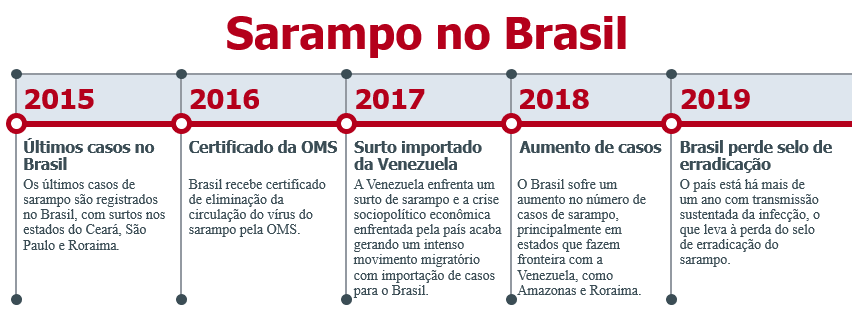

Nossa primeira categoria de vacinas a ser analisada é a do Sarampo. O Brasil já foi um país com selo de erradicação da doença, mas perdeu no ano passado (2019). Vamos tentar entender como estão as coberturas para essas vacinas ao longo dos últimos 10 anos (2010 a 2019) em cada um dos estados. Também vamos analisar a evolução dos casos dessa doença e tentar fazer um paralelo com a cobertura.

Como a região Norte foi a porta de entrada dos casos que trouxeram de volta casos de sarampo por conta da migração de pessoas vindas da Venezuela, decidi analisar somente os estados dessa região.


---


Abaixo fontes e notícias que utilizei para entender melhor o assunto.

**Fontes e Notícias**:

[Notícias UOL](https://noticias.uol.com.br/saude/ultimas-noticias/bbc/2018/07/07/sarampo-polio-difteria-e-rubeola-voltam-a-ameacar-apos-erradicacao-no-brasil.htm) - Sarampo, pólio, difteria e rubéola voltam a ameaçar após erradicação no Brasil

[Informe Ministério da Saúde](https://antigo.saude.gov.br/images/pdf/2018/marco/29/Informe-Sarampo.pdf) - Situação dos Casos de Sarampo
nos Estados de Roraima e Amazonas – 2018

[Periódico BJSCR](https://www.mastereditora.com.br/periodico/20201004_093724.pdf) - Brazilian Journal of Surgery and Clinical Research – BJSCR: Compreendendo o retorno do surto de sarampo no Brasil em 2019 e dados epidemiológicos até Fevereiro de 2020

### Analisando os casos

Antes de analisarmos as coberturas vacinais na região norte, vamos verificar a evolução de casos nos últimos 10 anos para os estados dessa região.

In [ ]:
casos_sarampo = pd.read_csv('https://raw.githubusercontent.com/marcelagomescorrea/bootcamp_alura/main/Modulo_02/datasets/casos_sarampo.csv?raw=true',
                          encoding='ISO-8859-1', sep=';', header=0,
                          engine='python', na_values=0.0)

casos_sarampo = add_coluna_regiao(casos_sarampo)
casos_sarampo.tail()

,uf,regiao,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010
20,Mato Grosso do Sul,Centro-Oeste,2.00,nan,nan,nan,nan,nan,1.00,nan,1.00,nan
21,Amapá,Norte,2.00,nan,nan,nan,nan,nan,nan,nan,nan,nan
22,Roraima,Norte,1.00,349.00,nan,nan,nan,11.00,nan,nan,nan,nan
23,Rondônia,Norte,nan,2.00,nan,nan,nan,nan,nan,nan,nan,nan
24,Mato Grosso,Centro-Oeste,nan,nan,nan,nan,nan,3.00,1.00,nan,nan,nan


In [ ]:
# mudando formato do dataframe
casos_sarampo_melted = casos_sarampo.melt(id_vars=['uf', 'regiao'],
                      var_name='ano',
                      value_name='casos')

regiao = 'Norte'
fig = plot_regiao(casos_sarampo_melted, regiao, ['casos'], with_bar=True, n_col=3)

set_fig(fig, title=f'Casos de Sarampo na Região {regiao} (2010 a 2019)',
                  width=700, height=600)

# configurando posição onde aparecerá a legenda com os valores
# aqui, no caso, estou configurando para parecer dentro das barras
fig.update_traces(textposition='inside')

fig.update_yaxes(dtick=1)
fig.update_layout(
    # configurando legenda com os valores de cada barra
    uniformtext_minsize=10,
    uniformtext_mode='show'
)

fig.show()

Como podemos ver há alguns surtos em anos específicos para alguns estados. Acre e Tocatins não apresentaram nenhum caso para o período analisado e, portanto, não foram representados nos gráficos acima.

Exceto Amapá e Rondônia que tiveram no máximo 2 casos, os outros estados apresentaram um número de casos de sarampo expressivo, com destaque para o estado Amazonas com quase 10 mil casos em 2018.

Vamos então olhar a cobertura vacinal desses três estados para o mesmo período.

### Analisando a cobertura vacinal

Vamos juntar os imunos relacionados ao sarampo para facilitar nossos filtros e depois vamos plotar a cobertura vacinal para a região norte.

In [ ]:
dados_todos_anos.columns

Index(['uf', 'regiao', 'ano', 'Meningococo C', 'Pneumocócica', 'Poliomielite',
       'Poliomielite 4 anos', 'Pneumocócica(1º ref)', 'Meningococo C (1º ref)',
       'Poliomielite(1º ref)', 'Tríplice Viral  D1', 'Tetra Viral(SRC+VZ)'],
      dtype='object')

In [ ]:
sarampo = ['Tríplice Viral  D1', 'Tetra Viral(SRC+VZ)']

In [ ]:
regiao = 'Norte'
fig = plot_regiao(dados_todos_anos, regiao, eixos_y=sarampo, n_col=2)

set_fig(fig,
    title=f'Cobertura Vacinal contra Sarampo na Região {regiao} (2010 a 2020)',
    width=800, height=800)

fig.update_yaxes(range=(0,150), title='Cobertura (%)')
fig.update_xaxes(dtick=2)

fig.show()

Pelos gráficos acima, verifica-se que todos os estados, exceto Rondônia, não conseguiram atingir a meta de 95% em alguma das vacinas nos últimos anos. Vamos tentar analisar com uma tabela estilizada os números para os estados que escolhemos anteriormente: Amazonas, Roraima e Pará.

Mas antes vamos mudar o formato do nosso dataframe com algumas funções apresentadas no Módulo 2.

In [ ]:
dados_todos_anos.head()

,uf,regiao,ano,Meningococo C,Pneumocócica,Poliomielite,Poliomielite 4 anos,Pneumocócica(1º ref),Meningococo C (1º ref),Poliomielite(1º ref),Tríplice Viral D1,Tetra Viral(SRC+VZ)
0,Rondônia,Norte,2019,92.63,102.44,98.26,63.78,97.68,89.81,75.47,106.42,70.74
1,Acre,Norte,2019,89.67,91.53,81.73,50.98,78.82,85.96,70.66,87.39,75.68
2,Amazonas,Norte,2019,89.23,92.51,83.29,75.83,86.41,90.88,77.02,92.12,72.71
3,Roraima,Norte,2019,83.54,90.26,79.76,67.68,72.63,77.20,69.29,81.21,74.53
4,Pará,Norte,2019,77.41,82.14,72.72,39.49,73.55,74.55,60.00,82.81,59.90


In [ ]:
#colunas que queremos
colunas_sarampo = sarampo.copy() #nome dos imunos
colunas_sarampo.insert(0, 'uf')
colunas_sarampo.insert(1, 'ano')

colunas_sarampo

['uf', 'ano', 'Tríplice Viral  D1', 'Tetra Viral(SRC+VZ)']

In [ ]:
#filtrando os dados apenas dos estados do Amazonas e de Roraima
busca = 'uf == "Amazonas" | uf == "Roraima" | uf == "Pará"'
dados_am_rr_pa = dados_todos_anos[colunas_sarampo].query(busca)\
        .sort_values(by=['uf', 'ano'])

dados_am_rr_pa.sample(10)

,uf,ano,Tríplice Viral D1,Tetra Viral(SRC+VZ)
87,Roraima,2016,90.77,83.64
255,Roraima,2010,94.49,nan
58,Amazonas,2017,79.83,59.11
171,Roraima,2013,89.07,18.29
88,Pará,2016,69.61,62.39
256,Pará,2010,110.95,nan
4,Pará,2019,82.81,59.90
198,Amazonas,2012,103.39,nan
200,Pará,2012,102.20,nan
116,Pará,2015,71.92,37.78


A primeira função que iremos utilizar é a **Pivot** para rotacionar nosso dataframe, colocando os anos como colunas.

In [ ]:
dados_am_rr_pa_with_pivot = dados_am_rr_pa.pivot(columns=['ano'], index=['uf'],
                                            values=['Tríplice Viral  D1',
                                                    'Tetra Viral(SRC+VZ)'], )
 
#renomeando o label das nossas multi colunas
dados_am_rr_pa_with_pivot.columns.names = ['imuno', 'ano']
dados_am_rr_pa_with_pivot

imuno    Tríplice Viral  D1                      ... Tetra Viral(SRC+VZ)                  
ano                    2010   2011   2012  2013  ...                2016  2017  2018  2019
uf                                               ...                                      
Amazonas             100.11  94.67 103.39 98.77  ...               75.80 59.11 58.52 72.71
Pará                 110.95 109.25 102.20 98.49  ...               62.39 51.04 48.29 59.90
Roraima               94.49  97.98  87.83 89.07  ...               83.64 84.65 71.34 74.53

[3 rows x 20 columns]

Ainda não está no formato que eu quero. Temos dois níveis de colunas, *imuno* e *ano*, vamos usar a função **Stack** para empilhar os dados dos imunos um sobre o outro, quase como se quebrássemos nosso dataframe ao meio e colocássemos uma metade em cima da outra.

In [ ]:
dados_am_rr_pa_with_pivot.stack('imuno')

ano                            2010   2011   2012  2013  ...  2016  2017  2018  2019
uf       imuno                                           ...                        
Amazonas Tetra Viral(SRC+VZ)    nan    nan    nan 30.44  ... 75.80 59.11 58.52 72.71
         Tríplice Viral  D1  100.11  94.67 103.39 98.77  ... 83.56 79.83 89.81 92.12
Pará     Tetra Viral(SRC+VZ)    nan    nan    nan 20.14  ... 62.39 51.04 48.29 59.90
         Tríplice Viral  D1  110.95 109.25 102.20 98.49  ... 69.61 67.51 77.30 82.81
Roraima  Tetra Viral(SRC+VZ)    nan    nan    nan 18.29  ... 83.64 84.65 71.34 74.53
         Tríplice Viral  D1   94.49  97.98  87.83 89.07  ... 90.77 86.53 99.32 81.21

[6 rows x 10 columns]

Agora sim podemos aplicar a estilização para analisar melhor nossos dados.

In [ ]:
dados_am_rr_pa_with_pivot.stack('imuno').style.set_table_attributes(
    'class="dataframe"').apply(
        atingiu_meta).apply(
            destaca_min, axis=1)

Analisando a tabela acima e considerando a evolução de casos para esses estados, vemos que a meta de 95% é atingida apenas em 2018 em Roraima, enquanto que nos outros estados, a partir de 2016, ela não é atingida. Além disso, temos valores mínimos para alguns imunos em 2017 (valores em amarelos), podendo representar uma possível causa para o aumento de casos de sarampo nesses estados.


### Conclusão

Por fim, apesar da minha análise ter sido feita apenas em cima da região norte, é fato que atualmente o Brasil sofre com casos crescentes de Sarampo em todas as regiões, com destaque para as regiões Sul e Sudeste.

Na conclusão do meu projeto, irei elencar possíveis causas e cenários para essa queda contínua de cobertura vacinal.

---


Abaixo fontes e notícias que utilizei para entender melhor o assunto.

**Fontes e Notícias**:

[Correio Brasiliense](https://www.correiobraziliense.com.br/app/noticia/ciencia-e-saude/2019/03/20/interna_ciencia_saude,744111/sarampo-perder-certificado-de-eliminacao-e-retrocesso-inegavel.shtml) - Sarampo: perder certificado de eliminação é retrocesso inegável, diz especialista

[BBC Brasil](https://www.bbc.com/portuguese/brasil-41045273) - Vacinação em queda no Brasil preocupa autoridades por risco de surtos e epidemias de doenças fatais

[Brasil de Fato](https://www.brasildefato.com.br/2020/05/13/em-meio-a-covid-19-casos-de-sarampo-no-brasil-aumentam-23-vezes-em-2020) - Em meio à covid-19, Brasil tem 23 vezes mais casos de sarampo em 2020




## Meningite

Nossa segunda análise será em cima de imunos relacionados à meningite, uma doença considerada grave e que geralmente atinge crianças até 4 anos.

Antes de analisarmos a cobertura vacinal, vamos analisar os casos de meningite nos últimos anos.

In [ ]:
casos_meningite = pd.read_csv('https://raw.githubusercontent.com/marcelagomescorrea/bootcamp_alura/main/Modulo_02/datasets/casos_meningite.csv?raw=true',
                          encoding='ISO-8859-1', sep=';', header=0,
                          engine='python', skiprows=4, skipfooter=21)

#renomeando coluna de UF
casos_meningite = casos_meningite.rename(
    columns = {'UF de notificação':'uf'})

#dropando a coluna Total e de 2020
casos_meningite.drop(['Total', '2020'], axis=1, inplace=True)
casos_meningite.tail()

#adicionando a coluna com a Região
casos_meningite = add_coluna_regiao(casos_meningite)
casos_meningite.tail()

,uf,regiao,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
22,Rio Grande do Sul,Sul,1595,1446,1242,1158,1159,1285,1123,1366,1175,993
23,Mato Grosso do Sul,Centro-Oeste,178,216,138,193,129,176,221,191,130,140
24,Mato Grosso,Centro-Oeste,175,216,244,250,224,168,187,205,158,148
25,Goiás,Centro-Oeste,414,375,486,310,275,310,262,216,206,214
26,Distrito Federal,Centro-Oeste,242,185,171,159,182,162,136,138,127,171


Agora que importamos nossos dados, acrescentamos a coluna com a região e dropamos as colunas com o total e dados do ano de 2020, vamos mudar o formato dos dados para plotar alguns gráficos.

In [ ]:
#mudando formato do dataframe
casos_meningite_melted = casos_meningite.melt(id_vars=['uf', 'regiao'],
                      var_name='ano',
                      value_name='casos')

casos_meningite_melted.head()

,uf,regiao,ano,casos
0,Rondônia,Norte,2010,61
1,Acre,Norte,2010,29
2,Amazonas,Norte,2010,134
3,Roraima,Norte,2010,25
4,Pará,Norte,2010,358


In [ ]:
fig = go.Figure()

for regiao in casos_meningite_melted.regiao.unique():
    dados_regiao = casos_meningite_melted\
                .query(f'regiao == "{regiao}"')\
                .groupby(['regiao', 'ano'], as_index=False).agg('sum') 

    fig.add_trace(go.Scatter(x = dados_regiao['ano'],
                                y = dados_regiao['casos'],
                                mode = 'lines+markers',
                                name = regiao,
                                line_shape = "spline"))

fig.update_xaxes(dtick=1)
fig.update_layout(
    template = 'plotly_white',

    #configurando título e nome dos eixos
    title_text = 'Casos de Meningite por região para os anos de 2010 a 2019',
    xaxis_title_text = 'Ano',
    yaxis_title_text = 'Número de casos',
    
    #configurando posição da legenda
    legend=dict(title='', orientation="h", y=0.96,
                yanchor="bottom", xanchor="right", x = 1),

    #configurando e fixando o tamanho do gráfico
    autosize=False,
    width=700,
    height=500,
)

fig.show()

Vemos no gráfico acima que a região sudeste possui uma diferença gritante no número de casos comparado com as outras regiões. Vamos então analisar os dados só dessa região.

In [ ]:
cores = ['orangered', 'purple', 'forestgreen', 'dodgerblue']
meningite = ['Pneumocócica', 'Pneumocócica(1º ref)',
             'Meningococo C (1º ref)', 'Meningococo C']
regiao = 'Sudeste'
busca = f'regiao == "{regiao}"'

dados_sudeste = dados_todos_anos.query(busca)
dados_sudeste_melted = casos_meningite_melted.query(busca)
estados = dados_sudeste.uf.unique()

fig = make_subplots(cols=len(estados), rows=2,
                    subplot_titles=estados.tolist()*2,
                    row_heights=[0.6, 0.4])

for idx, estado in enumerate(dados_sudeste.uf.unique()):
    dados_estado = dados_sudeste.query(f'uf == "{estado}"')    
    dados_estado_melted = dados_sudeste_melted.query(f'uf == "{estado}"')    

    for i, eixo in enumerate(meningite):
        fig.add_trace(go.Scatter(x = dados_estado['ano'],
                                y = dados_estado[eixo],
                                mode = 'lines+markers',
                                name = eixo,
                                line_shape="spline",
                                marker_color = cores[i],
                                showlegend=idx==0), row=1, col=idx+1)
        fig.update_yaxes(title='Cobertura (%)', range=[0, 133], dtick=25,
                         row=1, col=idx+1)
        

    fig.add_trace(go.Bar(x = dados_estado_melted['ano'],
                        y = dados_estado_melted['casos'],
                        text=dados_estado_melted['casos'],
                        showlegend=False,
                        textposition='inside'), row=2, col=idx+1)
    fig.update_yaxes(title='Casos', showticklabels=False,
                     row=2, col=idx+1)

# configurando o eixo X
fig.update_xaxes(tickangle = 270, dtick=1, title='Anos')

fig.update_layout(
    template = 'plotly_white',

    # configurando título e nome dos eixos
    title_text = 'Cobertura Vacinal vs Casos de Meningite no Sudeste (2010 a 2019)',

    # configurando posição da legenda
    legend=dict(title='', orientation="h", y=1.08,
                yanchor="bottom", xanchor="right", x = 1),

)

fig.show()


Colocando no mesmo gráfico o número de casos e a porcentagem (%) de cobertura vacinal para cada estado da região Sudeste, conseguimos verificar alguns vales na cobertura vacinal nos mesmos anos onde tem os picos de casos dos estados, como podemos ver em 2017 nos estados do Espírito Santo e de Minas Gerais.

O contrário também é observado, podemos ver com picos de cobertura vacinal com vales no número de casos, como vemos em 2015 nos estados do Rio de Janeiro e de São Paulo, e em 2016 nos estados de Espírito Santos e de Minas Gerais.

Novamente, vemos que a meta de 95% raramente é atingida nos últimos anos.

## Poliomielite

Nossa última análise será em cima da Poliomielite.

Em 24 de outubro, comemorou-se o dia mundial de combate à poliomielite, também chamada de paralisia infantil. Essa doença não tem cura e é altamente contagiosa, além de acometer principalmente crianças de até 5 anos de idade que não foram imunizadas. A única forma de prevenção é a vacina, que deve ser ministrada em todas as crianças menores de 5 anos.

O Brasil não registra casos de polio há mais de 30 anos, no entanto, em 2018 o Ministério da Saúde emitiu alerta de baixa cobertura vacinal, após um caso de poliomielite ser confirmado na Venezuela, ameaçando cada vez mais um surto dessa doença no país.

Vamos verificar como está a cobertura vacinal contra essa doença no Brasil nos últimos anos.

---


Abaixo fontes e notícias que utilizei para entender melhor o assunto.

**Fontes e Notícias**:

[Saúde Abril](https://saude.abril.com.br/blog/com-a-palavra/estamos-mesmo-livres-da-poliomielite/) - Estamos mesmo livres da poliomielite?

[Globo Bem Estar](https://g1.globo.com/bemestar/noticia/erradicacao-de-polio-e-sarampo-criou-falsa-sensacao-de-que-vacinacao-nao-e-mais-necessaria-diz-ministerio-da-saude.ghtml) - Erradicação de pólio e sarampo criou 'falsa sensação' de que vacinação não é mais necessária, diz Ministério da Saúde

[Globo Bem Estar](https://g1.globo.com/bemestar/noticia/brasil-quer-meta-de-95-de-vacinacao-contra-paralisia-infantil-apos-caso-na-venezuela.ghtml) - Brasil quer meta de 95% de vacinação contra paralisia infantil após caso na Venezuela

[Globo Bem Estar](https://g1.globo.com/bemestar/noticia/poliomielite-312-cidades-brasileiras-nao-vacinaram-mais-da-metade-das-criancas-de-ate-1-ano.ghtml) - Poliomielite: 312 cidades brasileiras não vacinaram mais da metade das crianças de até 1 ano

Novamente vamos separar os imunos associados à polio.

In [ ]:
poliomielite = ['Poliomielite', 'Poliomielite 4 anos', 'Poliomielite(1º ref)']
dados_todos_anos[poliomielite]

,Poliomielite,Poliomielite 4 anos,Poliomielite(1º ref)
0,98.26,63.78,75.47
1,81.73,50.98,70.66
2,83.29,75.83,77.02
3,79.76,67.68,69.29
4,72.72,39.49,60.00
...,...,...,...
274,92.34,nan,nan
275,99.64,nan,nan
276,100.40,nan,nan
277,100.56,nan,nan


In [ ]:
dados_todos_anos.head()

,uf,regiao,ano,Meningococo C,Pneumocócica,Poliomielite,Poliomielite 4 anos,Pneumocócica(1º ref),Meningococo C (1º ref),Poliomielite(1º ref),Tríplice Viral D1,Tetra Viral(SRC+VZ)
0,Rondônia,Norte,2019,92.63,102.44,98.26,63.78,97.68,89.81,75.47,106.42,70.74
1,Acre,Norte,2019,89.67,91.53,81.73,50.98,78.82,85.96,70.66,87.39,75.68
2,Amazonas,Norte,2019,89.23,92.51,83.29,75.83,86.41,90.88,77.02,92.12,72.71
3,Roraima,Norte,2019,83.54,90.26,79.76,67.68,72.63,77.20,69.29,81.21,74.53
4,Pará,Norte,2019,77.41,82.14,72.72,39.49,73.55,74.55,60.00,82.81,59.90


In [ ]:
for regiao in dados_todos_anos.regiao.unique():
    fig = plot_regiao(dados_todos_anos, regiao, eixos_y=poliomielite)

    set_fig(fig,
        title=f'Cobertura Vacinal contra Poliomielite na Região {regiao} (2010 a 2019)')

    fig.update_yaxes(range=(0,150), title='Cobertura (%)')
    fig.update_xaxes(dtick=1)

    fig.show()

Passando o olho nos gráficos gerados, podemos ver que nos últimos três anos, quase nenhum estado apresentou a cobertura vacinal adequada contra essa doença. Vamos utilizar a tabela restilizada para esses anos.

In [ ]:
poliomielite

['Poliomielite', 'Poliomielite 4 anos', 'Poliomielite(1º ref)']

In [ ]:
# colunas que queremos
colunas_polio = poliomielite.copy() # nome dos imunos
colunas_polio.insert(0, 'uf')
colunas_polio.insert(1, 'ano')

# pivoteando os dados
dados_polio = dados_todos_anos[colunas_polio].sort_values(by=['uf', 'ano'])
dados_polio_with_pivot = dados_polio.pivot(columns=['ano'], index=['uf'],
                                            values=['Poliomielite',
                                                    'Poliomielite 4 anos',
                                                    'Poliomielite(1º ref)'], )

# renomeando o label das multi colunas
dados_polio_with_pivot.columns.names = ['imuno', 'ano']

# empilhando e estilizando os valores
dados_polio_with_pivot.stack('imuno').style.set_table_attributes(
    'class="dataframe"').apply(
        atingiu_meta).apply(
            destaca_min, axis=1).apply(
                nulos)


A tabela comprova nossa hipótese: a cobertura vacinal está muito abaixo da meta de 95% nos anos de 2016 em diante, ameaçando a saúde pública com um possível retorno de mais uma doença erradicada no Brasil.

# Conclusão

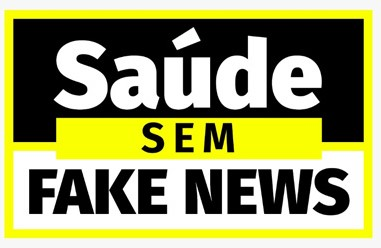

Infelizmente vivemos um momento de muitas incertezas alimentadas por fake news que circulam livremente pelas redes sociais sem quaisquer filtros ou censura.

Nesse contexto, surge o movimento antivacina, presente no mundo todo. Com um discurso negacionista sustentado apenas com notícias falsas, esse movimento dissemina informações fraudulentas ou errôneas a respeito das vacinas.

Tudo começou com o estudo de um médico britânico que afirmava que a vacina tríplice viral causava autismo. Apesar desse estudo ter sido desmentido, suas consequências são sentidas até hoje. 

O movimento antivacina segue ganhando cada vez mais adeptos nos dias de hoje, se valendo das redes sociais, que facilitam o compartilhamento de conteúdos duvidosos.

Argumentos como questionamentos a respeito da segurança dos medicamentos, divulgação de métodos naturais para evitar doenças e teorias conspiratórias, tem feito com que cada vez menos pais levem seus filhos para vacinar.

Como foi evidenciado nas minhas análises, tudo isso gera consequências na saúde pública, como doenças antes erradicadas, voltando em surtos e queda constante na cobertura vacinal da população brasileira.


# Referências

**Fontes de Dados**

[Tabnet](http://tabnet.datasus.gov.br/cgi/dhdat.exe?bd_pni/cpnibr.def) - Imunizações x Cobertura x Brasil

[Tabnet](http://tabnet.datasus.gov.br/cgi/deftohtm.exe?sinannet/cnv/meninbr.def) - Meningite - Casos confirmados e notificados no SINAN

[Tabnet](http://tabnet.datasus.gov.br/cgi/deftohtm.exe?sinannet/cnv/pfabr.def) - Paralisia Flácida Aguda - Casos confirmados e notificados no SINAN

[Ministério da Saúde](https://antigo.saude.gov.br/boletins-epidemiologicos) - Boletins Epidemiológicos

[Ministério da Saúde](https://antigo.saude.gov.br/saude-de-a-z/sarampo) - Sarampo: sintomas, prevenção, causas, complicações e tratamento

[Ministério da Saúde](http://antigo.saude.gov.br/saude-de-a-z/poliomielite) - Poliomielite: causas, sintomas, diagnóstico e vacinação

[Ministério da Saúde](https://antigo.saude.gov.br/saude-de-a-z/meningites) - Meningite: o que é, causas, sintomas, tratamento, diagnóstico e prevenção

[Periódico BJSCR](https://www.mastereditora.com.br/periodico/20201004_093724.pdf) - Brazilian Journal of Surgery and Clinical Research – BJSCR: Compreendendo o retorno do surto de sarampo no Brasil em 2019 e dados epidemiológicos até Fevereiro de 2020

---

**Notícias**

[GZH](https://gauchazh.clicrbs.com.br/saude/noticia/2020/09/por-que-o-programa-de-vacinacao-brasileiro-e-considerado-exemplar-ckeyi9ndx0013014yxc17ql6v.html) - Por que o programa de vacinação brasileiro é considerado exemplar

[Agência Brasil](https://agenciabrasil.ebc.com.br/geral/noticia/2016-09/abastecimento-de-vacinas-se-normalizara-em-2017-diz-ministerio-da-saude) - Abastecimento de vacinas se normalizará em 2017, diz Ministério da Saúde

[Informe Ministério da Saúde](https://antigo.saude.gov.br/images/pdf/2018/marco/29/Informe-Sarampo.pdf) - Situação dos Casos de Sarampo
nos Estados de Roraima e Amazonas – 2018

[BBC](https://www.bbc.com/portuguese/brasil-41045273) - Vacinação em queda no Brasil preocupa autoridades por risco de surtos e epidemias de doenças fatais

[Jovem Pan](https://jovempan.com.br/programas/ministerio-da-saude-admite-o-desabastecimento-de-vacinas.html) - Ministério da Saúde admite o desabastecimento de vacinas

[UOL VivaBem](https://www.uol.com.br/vivabem/noticias/redacao/2020/10/24/dia-mundial-de-combate-a-poliomielite-por-que-a-vacina-ainda-e-importante.htm) - Dia mundial de combate à poliomielite: por que a vacina ainda é importante?

[Correio Braziliense](https://www.correiobraziliense.com.br/app/noticia/ciencia-e-saude/2019/03/20/interna_ciencia_saude,744111/sarampo-perder-certificado-de-eliminacao-e-retrocesso-inegavel.shtml) - Sarampo: perder certificado de eliminação é retrocesso inegável, diz especialista

[Notícias UOL](https://noticias.uol.com.br/saude/ultimas-noticias/bbc/2018/07/07/sarampo-polio-difteria-e-rubeola-voltam-a-ameacar-apos-erradicacao-no-brasil.htm) - Sarampo, pólio, difteria e rubéola voltam a ameaçar após erradicação no Brasil

[Saúde Abril](https://saude.abril.com.br/blog/com-a-palavra/estamos-mesmo-livres-da-poliomielite/) - Estamos mesmo livres da poliomielite?

[Globo Bem Estar](https://g1.globo.com/bemestar/noticia/erradicacao-de-polio-e-sarampo-criou-falsa-sensacao-de-que-vacinacao-nao-e-mais-necessaria-diz-ministerio-da-saude.ghtml) - Erradicação de pólio e sarampo criou 'falsa sensação' de que vacinação não é mais necessária, diz Ministério da Saúde

[Globo Bem Estar](https://g1.globo.com/bemestar/noticia/brasil-quer-meta-de-95-de-vacinacao-contra-paralisia-infantil-apos-caso-na-venezuela.ghtml) - Brasil quer meta de 95% de vacinação contra paralisia infantil após caso na Venezuela

[Globo Bem Estar](https://g1.globo.com/bemestar/noticia/poliomielite-312-cidades-brasileiras-nao-vacinaram-mais-da-metade-das-criancas-de-ate-1-ano.ghtml) - Poliomielite: 312 cidades brasileiras não vacinaram mais da metade das crianças de até 1 ano
